<a href="https://colab.research.google.com/github/Sang897/hello-world/blob/master/Lab9_Jack(SangUk).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 
Examine	the	data	structure	that	str()	reveals.	Also	use	the	help()	command	to	
learn	more	about	the	GermanCredit	data	set. Summarize	what	you	see	in	a	
comment.

In [1]:
install.packages("kernlab")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




#2. 
Use	the createDataPartition() command	to	generate	a	list	of	cases	to	
include	in	the	training	data.	This	command	is	conveniently	provided	by	caret	and	
allows	one	to	directly	control	the	number	of	training	cases.	It	also	ensures	that	
the	training	cases	are	balanced	with	respect	to	the	outcome	variable.	Try	this:
trainList <-
createDataPartition(y=subCredit$Class,p=.40,list=FALSE)

In [6]:
install.packages("rpart.plot")
install.packages("rpart")
install.packages("rpart")
install.packages("rpart.plot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




3
Examine	the	contents	of	trainList to	make	sure	that	it	is	a	list	of	case	numbers.
With	p=0.40,	it	should	have	400	case	numbers	in	it```
```



In [8]:
library(rpart)
library(rpart.plot)
library(caret)
library(Rcpp)
library(rpart)
library(rpart.plot)

What	is	trainList?	What	do	the	elements	in	trainList	represent?	Which	attribute	
is	balanced	in	the	trainList	dataset?

In [14]:

data("GermanCredit")
set.seed(111) 

subCredit <- GermanCredit[,1:10]
str(subCredit)

'data.frame':	1000 obs. of  10 variables:
 $ Duration                 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ Amount                   : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ InstallmentRatePercentage: int  4 2 2 2 3 2 3 2 2 4 ...
 $ ResidenceDuration        : int  4 2 3 4 4 4 4 2 4 2 ...
 $ Age                      : int  67 22 49 45 53 35 53 35 61 28 ...
 $ NumberExistingCredits    : int  2 1 1 1 2 1 1 1 1 2 ...
 $ NumberPeopleMaintenance  : int  1 1 2 2 2 2 1 1 1 1 ...
 $ Telephone                : num  0 1 1 1 1 0 1 0 1 1 ...
 $ ForeignWorker            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Class                    : Factor w/ 2 levels "Bad","Good": 2 1 2 2 1 2 2 2 2 1 ...




#5 
What is trainList? What do the elements in trainList represent? Which attribute
is balanced in the trainList dataset?`



In [16]:
trainList <-
createDataPartition(y=subCredit$Class,p=.40,list=FALSE) 

#Trainlist randomly and failry selects thee list from subCredit. So P = 0.4 would be selecting 400 times.
# If it was P= 0.5 then it would be randomly selecting 500 times. 


#6
Use	trainList	and	the	square	brackets	notation	to	create	a	training	data	set	called	
“trainSet”	from	the	subCredit	data	frame.	Look	at	the	structure	of	trainSet	to	
make	sure	it	has	all	of	the	same	variables	as	subCredit. The	trainSet	structure	
should	be	a	data	frame	with	400	rows	and	10	columns.

In [19]:
trainSet <- subCredit[trainList,]
testSet <- subCredit[-trainList,]


#6
Create	and	interpret	boxplots	of	the	predictor	variables	in	relation	to	the	
outcome	variable	(Class).	

In [22]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [61]:
boxplot1<- ggplot(trainSet, aes(y=Amount, x=Class)) +geom_boxplot()
boxplot2<- ggplot(trainSet, aes(y=InstallmentRatePercentage, x=Class)) +geom_boxplot()
boxplot3<- ggplot(trainSet, aes(y=ResidenceDuration, x=Class)) +geom_boxplot()
boxplot5<- ggplot(trainSet, aes(y=NumberExistingCredits, x=Class)) +geom_boxplot()
boxplot6<- ggplot(trainSet, aes(y=NumberPeopleMaintenance, x=Class)) +geom_boxplot()
boxplot7<- ggplot(trainSet, aes(y=Telephone	, x=Class)) +geom_boxplot()
boxplot8<- ggplot(trainSet, aes(y=ForeignWorker	, x=Class)) +geom_boxplot()




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



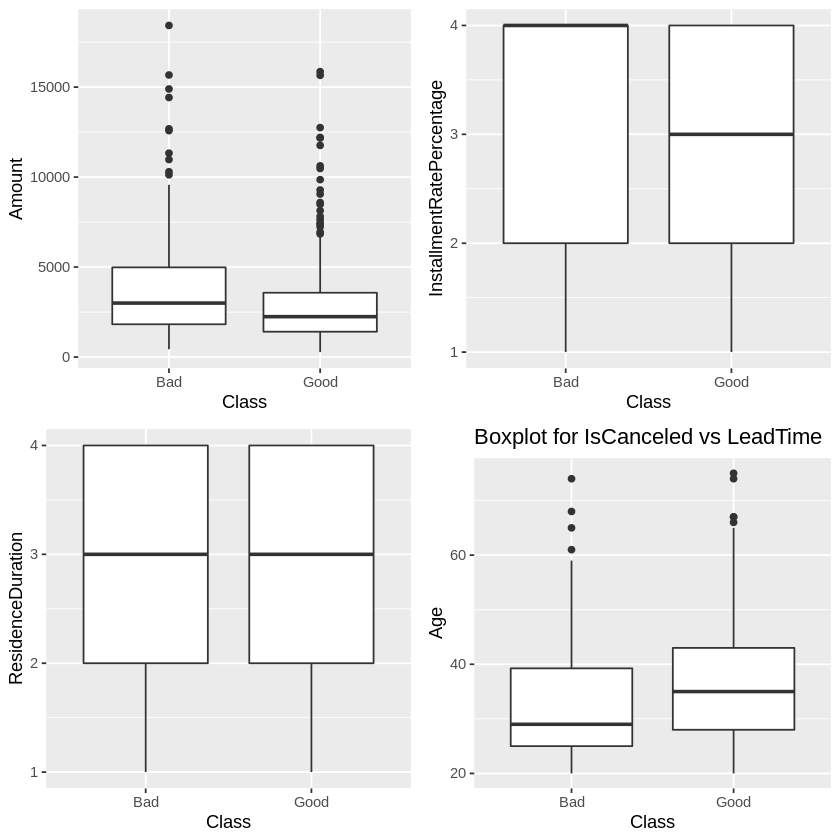

In [62]:

install.packages("gridExtra")
library("gridExtra")
grid.arrange(boxplot1, boxplot2, boxplot3,boxplot4,ncol=2)


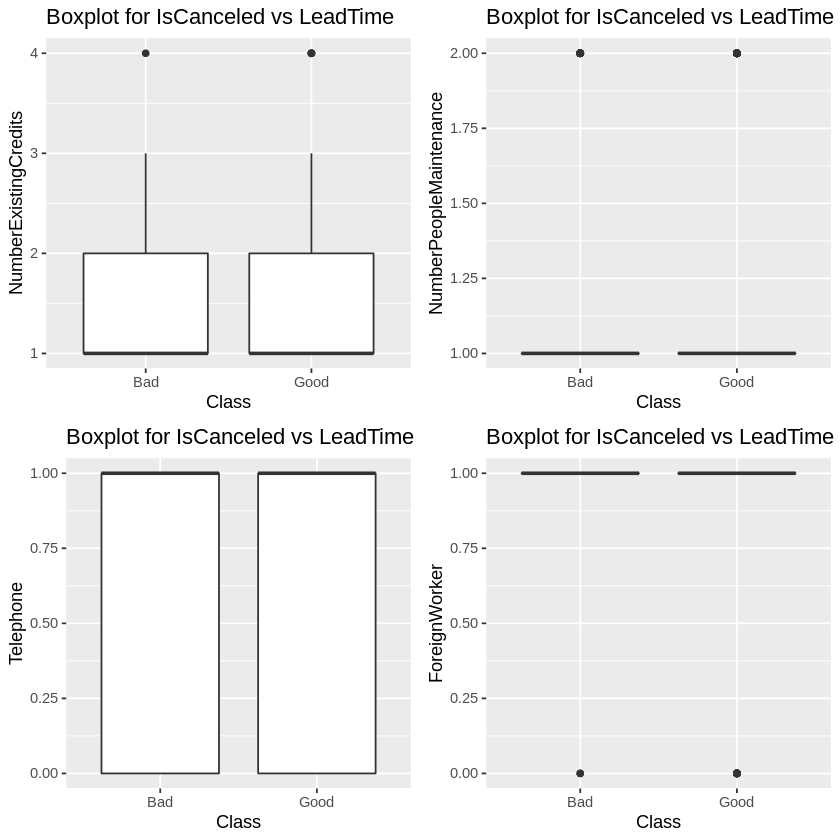

In [59]:
grid.arrange(boxplot5, boxplot6, boxplot7,boxplot8,ncol=2)

#Interpretation: It appears that class (either bad or good) is influenced 
#by Amount and Age that changes in the boxplot sizes while other varialbes remained the same. 


#8 
Train	a	support	vector	machine	with	the	ksvm()	function	from	the	kernlab	
package. Make	sure	that	you	have	installed	and	libraried	kernlab!	Have	the	cost	
be	5,	and	have	ksvm	do	3	cross	validations	(hint:	try	prob.model	=	TRUE)

In [44]:
fit2 <- train(Class ~ ., data=trainSet, method="svmRadial", preProc=c("center","scale"))


In [35]:
install.packages("kernlab")
library("kernlab")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [49]:
usingKVSM <- ksvm(trainSet, C=5, kernel="vanilladot", type = "C-svc",length = 4, lambda=0.5,prob.model=TRUE)



ERROR: ignored

#9
Examine	the	ksvm	output	object.	In	particular,	look	at	the	cross-validation	error	
for	an	initial	indication	of model	quality.	Add	a	comment	that	gives	your	opinion	
on	whether	this	is	a	good	model.**bold text**

Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad    5    4
      Good 175  416
                                         
               Accuracy : 0.7017         
                 95% CI : (0.6633, 0.738)
    No Information Rate : 0.7            
    P-Value [Acc > NIR] : 0.4846         
                                         
                  Kappa : 0.0251         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.027778       
            Specificity : 0.990476       
         Pos Pred Value : 0.555556       
         Neg Pred Value : 0.703892       
             Prevalence : 0.300000       
         Detection Rate : 0.008333       
   Detection Prevalence : 0.015000       
      Balanced Accuracy : 0.509127       
                                         
       'Positive' Class : Bad            
                                         

 Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 1 2 2 2 ...


Examine	the	predicted	out object	with	str(	).	Then,	calculate	a	confusion	matrix	
using	the	table	function.

10. Predict	the	training	cases	using	the	predict	command


In [57]:
predOut <- predict(fit2, newdata=testSet)

str(predOut)

confusion <- confusionMatrix(predOut, testSet$Class)
confusion 

 Factor w/ 2 levels "Bad","Good": 2 2 2 2 2 2 1 2 2 2 ...


Confusion Matrix and Statistics

          Reference
Prediction Bad Good
      Bad    5    4
      Good 175  416
                                         
               Accuracy : 0.7017         
                 95% CI : (0.6633, 0.738)
    No Information Rate : 0.7            
    P-Value [Acc > NIR] : 0.4846         
                                         
                  Kappa : 0.0251         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.027778       
            Specificity : 0.990476       
         Pos Pred Value : 0.555556       
         Neg Pred Value : 0.703892       
             Prevalence : 0.300000       
         Detection Rate : 0.008333       
   Detection Prevalence : 0.015000       
      Balanced Accuracy : 0.509127       
                                         
       'Positive' Class : Bad            
                                         

ERROR: ignored